# Importing Packages

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Reading Dataset

In [4]:
dataset = pd.read_csv('winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1595,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


# Describing the dataset

In [7]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


In [8]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [10]:
dataset.quality.value_counts().sort_index()

3     10
4     52
5    680
6    637
7    199
8     18
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

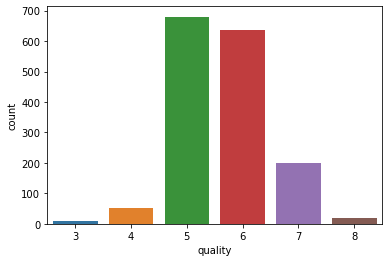

In [11]:
sns.countplot(x='quality',data=dataset)

In [12]:
dataset['alcohol'].describe()

count    1596.000000
mean       10.421147
std         1.060371
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.000000
Name: alcohol, dtype: float64

# Statistical Dispersion of dataset

In [13]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002232
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


# Correlations

In [16]:
dataset_out = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset_out.shape

(1179, 12)

In [17]:
dataset_out

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
correlations =  dataset_out.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.113422
volatile acidity       -0.346962
citric acid             0.212133
residual sugar          0.007934
chlorides              -0.190869
free sulfur dioxide    -0.003609
total sulfur dioxide   -0.203374
density                -0.215375
pH                     -0.060288
sulphates               0.413533
alcohol                 0.492551
Name: quality, dtype: float64


# HeatMap

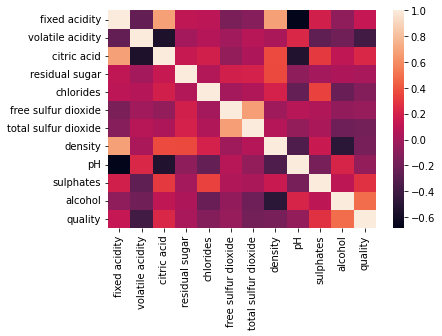

In [19]:
sns.heatmap(dataset.corr())
plt.show()

# Finding Outliers With Box Plot

[Text(0.5, 0, 'Quality'),
 Text(0, 0.5, 'Alcohol'),
 Text(0.5, 1.0, 'Alcohol % in different samples')]

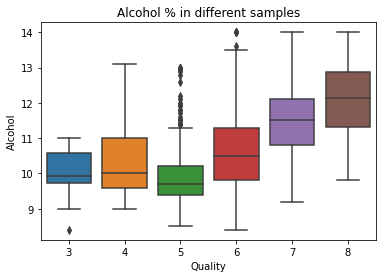

In [20]:
bx = sns.boxplot(x='quality', y='alcohol', data = dataset)
bx.set(xlabel='Quality', ylabel='Alcohol', title='Alcohol % in different samples')

# Training & Testing the Dataset

In [26]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [27]:
features = get_features(0.05)
print(features)
x = dataset_out[features]
y = dataset_out['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [30]:
x

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,0.090,44.0,0.99490,3.45,0.58,10.5
1592,5.9,0.550,0.10,0.062,51.0,0.99512,3.52,0.76,11.2
1593,6.3,0.510,0.13,0.076,40.0,0.99574,3.42,0.75,11.0
1594,5.9,0.645,0.12,0.075,44.0,0.99547,3.57,0.71,10.2


In [31]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1591    5
1592    6
1593    6
1594    5
1595    6
Name: quality, Length: 1179, dtype: int64

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3)

In [35]:
y_test.shape

(354,)

# Applying Linear Regression

In [36]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [37]:
train_pred = regressor.predict(x_train)
train_pred

array([6.14356299, 5.11710037, 5.21197237, 5.13828062, 5.97949972,
       5.66562893, 5.4777587 , 5.75868703, 5.98907913, 5.40401462,
       5.52303708, 5.21113234, 5.38046811, 5.75877598, 5.35007708,
       5.08567146, 5.70418446, 6.15016457, 4.98217495, 6.37902248,
       5.34435775, 5.58388766, 5.56975986, 6.5429133 , 5.95905468,
       5.36649122, 5.24598625, 5.58550515, 5.18791293, 5.25072061,
       5.10187748, 5.00442024, 5.69182774, 5.89415555, 5.21543362,
       5.72691046, 5.08042222, 5.16537087, 6.26665775, 5.11379649,
       4.84031354, 5.32908031, 6.59578316, 5.9574155 , 5.17612261,
       5.52155991, 5.08413929, 6.1392644 , 5.48990749, 5.93825753,
       6.23616917, 5.92388793, 5.7786765 , 6.0650639 , 5.79356716,
       5.78930793, 6.0279377 , 4.86136512, 6.06957539, 5.1960625 ,
       5.82623979, 5.21010511, 5.18855806, 5.17190517, 5.06530766,
       5.2522647 , 5.64833165, 5.66231692, 5.54553416, 5.89096209,
       5.29556643, 5.10200981, 5.02472467, 5.47288678, 5.45596

In [41]:
test_pred=regressor.predict(x_test)
test_pred

array([5.31808602, 5.58846727, 5.83179258, 5.23562426, 6.36492755,
       5.75166188, 5.61511554, 6.51307801, 6.033911  , 5.66126467,
       5.15680921, 5.48432811, 5.53204251, 5.17612261, 5.98484046,
       5.76958525, 6.09867422, 5.24902132, 5.45163284, 5.31035025,
       5.09350311, 5.87828479, 6.40866401, 5.412199  , 5.96442862,
       5.64014045, 5.51992784, 5.13588457, 6.28333602, 5.24519459,
       5.0320614 , 5.27962193, 5.59753018, 5.48395895, 5.58964467,
       6.0845468 , 5.19985585, 6.19604141, 5.34136276, 5.46949893,
       5.52658067, 5.96992765, 5.69237733, 6.52259415, 5.39271847,
       5.25392748, 5.99084808, 5.47407662, 5.49640697, 5.43513813,
       6.32835806, 6.16672701, 6.20060859, 5.78978599, 5.70708754,
       5.27350261, 5.36347142, 5.35513893, 6.26073939, 5.39379095,
       5.13365707, 5.39539395, 5.31604688, 5.55738131, 5.35711922,
       5.41823198, 5.04290802, 5.63751858, 5.05701887, 5.37699259,
       5.4916961 , 6.49050987, 5.67902012, 5.58946844, 5.62497

In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:',rmse)

Mean Absolute Error: 0.4566775059037424
Mean Squared Error: 0.3215866714647044
Root Mean Squared Error: 0.5670861234986309


In [44]:
from sklearn.metrics import r2_score
r2_score(y_test,test_pred)

0.40704840254144214

In [46]:
coeffecients = pd.DataFrame(regressor.coef_,features)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
fixed acidity,0.042297
volatile acidity,-0.816828
citric acid,-0.400865
chlorides,-2.684283
total sulfur dioxide,-0.001473
density,-23.748664
pH,-0.472842
sulphates,1.712367
alcohol,0.247527


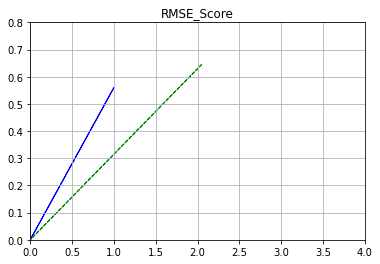

In [49]:
import matplotlib.pyplot as plt1
ax=plt1.axes()
color1= 'green'
color2= 'blue'
ax.arrow(0,0,1,0.56,head_width=0.00, head_length=0, fc=color2, ec=color2) 
ax.arrow(0,0,2,0.63,head_width=0.00, head_length=0.05, fc=color1, ec=color1, linestyle='--')
ax.set_ylim([0,0.8])
ax.set_xlim([0,4])
plt.grid()
plt.title('RMSE_Score')
plt1.show()

In [51]:
prediction=regressor.predict(x_test)

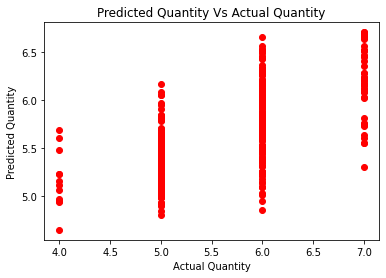

In [52]:
plt.scatter(y_test,prediction, c='r')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Predicted Quantity Vs Actual Quantity')
plt.show()